In [3]:
from pysb.macros import *

In [4]:
from pysb import *

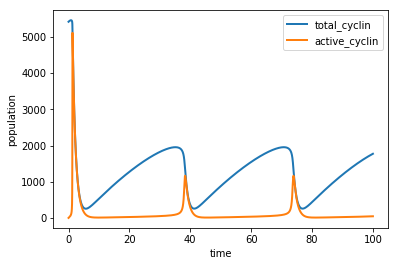

In [32]:
from scipy.constants import N_A

Model()

Monomer('cyclin', ['Y', 'b'], {'Y': ['U','P']})
Monomer('cdc2', ['Y', 'b'], {'Y': ['U','P']})

VOL = 1e-20
NA_V = N_A*VOL

Parameter('k1', 0.015*NA_V)
Parameter('k2', 0)
Parameter('k3', 200/NA_V)
Parameter('k4', 2*180/NA_V/NA_V)
Parameter('kp4', 0.018)
Parameter('k5', 0)
Parameter('k6', 1.0)
Parameter('k7', 0.6)
Parameter('k8', 1e6)
Parameter('k9', 1e3)

synthesize(cyclin(Y='U', b=None), k1)

Rule('BindingAndPhosphoylation', cyclin(Y='U', b=None) + 
     cdc2(Y='P', b=None) >> 
     cyclin(Y='P', b=1) % cdc2(Y='P', b=1), k3)

Rule('Activation', cyclin(Y='P', b=1) % cdc2(Y='P', b=1) >> 
     cyclin(Y='P', b=1) % cdc2(Y='U', b=1), kp4)

Rule('Autocatalytic', cyclin(Y='P', b=1) % cdc2(Y='P', b=1) +
     cyclin(Y='P', b=2) % cdc2(Y='U', b=2) +
     cyclin(Y='P', b=2) % cdc2(Y='U', b=2) >>
cyclin(Y='P', b=1) % cdc2(Y='U', b=1) +
     cyclin(Y='P', b=2) % cdc2(Y='U', b=2) +
     cyclin(Y='P', b=2) % cdc2(Y='U', b=2), k4)

Rule('Dissociation', cyclin(Y='P', b=1) % cdc2(Y='U', b=1) >>
     cdc2(Y='U', b=None), k6)

equilibrate(cdc2(Y='U', b=None), cdc2(Y='P', b=None), [k8, k9])

#Initial conditions
Parameter("cdc_0", 1 * NA_V)
Initial(cdc2(Y='P', b=None), cdc_0)

# [Y] in Tyson
Parameter('cyc_0', 0.9 * NA_V)
Initial(cyclin(Y='U', b=None), cyc_0)

Observable('total_cyclin', cyclin()) 
Observable('active_cyclin', cyclin(b=1, Y='P') % cdc2(b=1, Y='U'))

%matplotlib inline
from pysb.integrate import odesolve
from numpy import *
import matplotlib.pyplot as plt

t = linspace(0, 100, 10001)
x = odesolve(model, t)

plt.plot(t, x['total_cyclin'], lw=2, label='total_cyclin')
plt.plot(t, x['active_cyclin'], lw=2, label='active_cyclin')

plt.legend(loc=0)
plt.xlabel('time')
plt.ylabel('population')

plt.show()

